In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix

In [10]:
 # pip install pandas xlrd

In [11]:
data = pd.read_excel("default of credit card clients.xls", engine="xlrd", skiprows=1) 

In [12]:
df = pd.DataFrame(data)

In [13]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [15]:
df.shape

(30000, 25)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [17]:
# df.dtypes

## Data Cleaning

In [18]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [19]:
df.duplicated().sum()

0

### Rename columns

In [20]:
df = df.rename(columns={
    'PAY_0': 'sept_paystat',
    'PAY_2': 'aug_paystat',
    'PAY_3': 'july_paystat',
    'PAY_4': 'june_paystat',
    'PAY_5': 'may_paystat',
    'PAY_6': 'april_paystat',
    'BILL_AMT1': 'sept_bill',
    'BILL_AMT2': 'aug_bill',
    'BILL_AMT3': 'july_bill',
    'BILL_AMT4': 'june_bill',
    'BILL_AMT5': 'may_bill',
    'BILL_AMT6': 'april_bill',
    'PAY_AMT1': 'sept_payment',
    'PAY_AMT2': 'aug_payment',
    'PAY_AMT3': 'july_payment',
    'PAY_AMT4': 'june_payment',
    'PAY_AMT5': 'may_payment',
    'PAY_AMT6': 'april_payment'
})
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,sept_paystat,aug_paystat,july_paystat,june_paystat,...,june_bill,may_bill,april_bill,sept_payment,aug_payment,july_payment,june_payment,may_payment,april_payment,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


## Analyzing default payment next month column

In [21]:
target_value_count = df["default payment next month"].value_counts()

In [22]:
target_value_count

default payment next month
0    23364
1     6636
Name: count, dtype: int64

In [23]:
#here we can see our target column is inbalanced , now we can make balanced .
#there is a technology SMOT Synthetic Minority Over Sampling Techninique

In [24]:
from imblearn.over_sampling import SMOTE # pip install imbalanced-learn

In [25]:
smote =SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'default payment next month')], 
                                      df['default payment next month'])

In [26]:
print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


In [27]:
# Creating new dataframe as balanced_df after SMOTE
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'default payment next month'))

In [28]:
#adding target variable to new created dataframe
balanced_df['default payment next month'] = y_smote

In [29]:
target_value_count = balanced_df["default payment next month"].value_counts()
target_value_count

default payment next month
1    23364
0    23364
Name: count, dtype: int64

In [30]:
balanced_df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,sept_paystat,aug_paystat,july_paystat,june_paystat,...,june_bill,may_bill,april_bill,sept_payment,aug_payment,july_payment,june_payment,may_payment,april_payment,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [31]:
df2 =balanced_df.copy()

In [32]:
df2.shape

(46728, 25)

In [33]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,46728.0,14883.999080,8444.206556,1.0,7639.75,14817.0,22078.00,30000.0
LIMIT_BAL,46728.0,153881.979092,125949.984031,10000.0,50000.00,120000.0,220000.00,1000000.0
SEX,46728.0,1.508132,0.499939,1.0,1.00,2.0,2.00,2.0
EDUCATION,46728.0,1.765002,0.734350,0.0,1.00,2.0,2.00,6.0
MARRIAGE,46728.0,1.452042,0.514321,0.0,1.00,1.0,2.00,3.0
AGE,46728.0,35.416110,8.807356,21.0,28.00,34.0,41.00,79.0
sept_paystat,46728.0,0.174435,1.116429,-2.0,0.00,0.0,1.00,8.0
aug_paystat,46728.0,0.036852,1.207269,-2.0,-1.00,0.0,0.00,8.0
july_paystat,46728.0,-0.016286,1.201495,-2.0,-1.00,0.0,0.00,8.0
june_paystat,46728.0,-0.074067,1.197606,-2.0,-1.00,0.0,0.00,8.0


## we can drop id column

In [34]:
df3 = df2.drop('ID',axis=1)
df3.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,sept_paystat,aug_paystat,july_paystat,june_paystat,may_paystat,...,june_bill,may_bill,april_bill,sept_payment,aug_payment,july_payment,june_payment,may_payment,april_payment,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [35]:
df3.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'sept_paystat',
       'aug_paystat', 'july_paystat', 'june_paystat', 'may_paystat',
       'april_paystat', 'sept_bill', 'aug_bill', 'july_bill', 'june_bill',
       'may_bill', 'april_bill', 'sept_payment', 'aug_payment', 'july_payment',
       'june_payment', 'may_payment', 'april_payment',
       'default payment next month'],
      dtype='object')

In [36]:
#numerical columns
num_cols = df3.select_dtypes(include ='number')
for col in num_cols.columns:
    print(f"Value Counts for {col}:\n{num_cols[col].value_counts()}\n{'-'*40}")


Value Counts for LIMIT_BAL:
LIMIT_BAL
50000     5530
20000     3690
30000     3066
80000     2298
200000    2029
          ... 
149156       1
226301       1
72533        1
235818       1
141035       1
Name: count, Length: 4118, dtype: int64
----------------------------------------
Value Counts for SEX:
SEX
2    23744
1    22984
Name: count, dtype: int64
----------------------------------------
Value Counts for EDUCATION:
EDUCATION
2    22614
1    17980
3     5613
5      298
4      158
6       51
0       14
Name: count, dtype: int64
----------------------------------------
Value Counts for MARRIAGE:
MARRIAGE
1    25797
2    20538
3      326
0       67
Name: count, dtype: int64
----------------------------------------
Value Counts for AGE:
AGE
29    2382
28    2206
30    2189
27    2149
34    1990
31    1984
36    1917
32    1897
33    1880
26    1878
35    1873
25    1784
37    1732
24    1629
38    1621
39    1594
40    1395
41    1368
23    1323
42    1307
44    1108
43    1087
45  

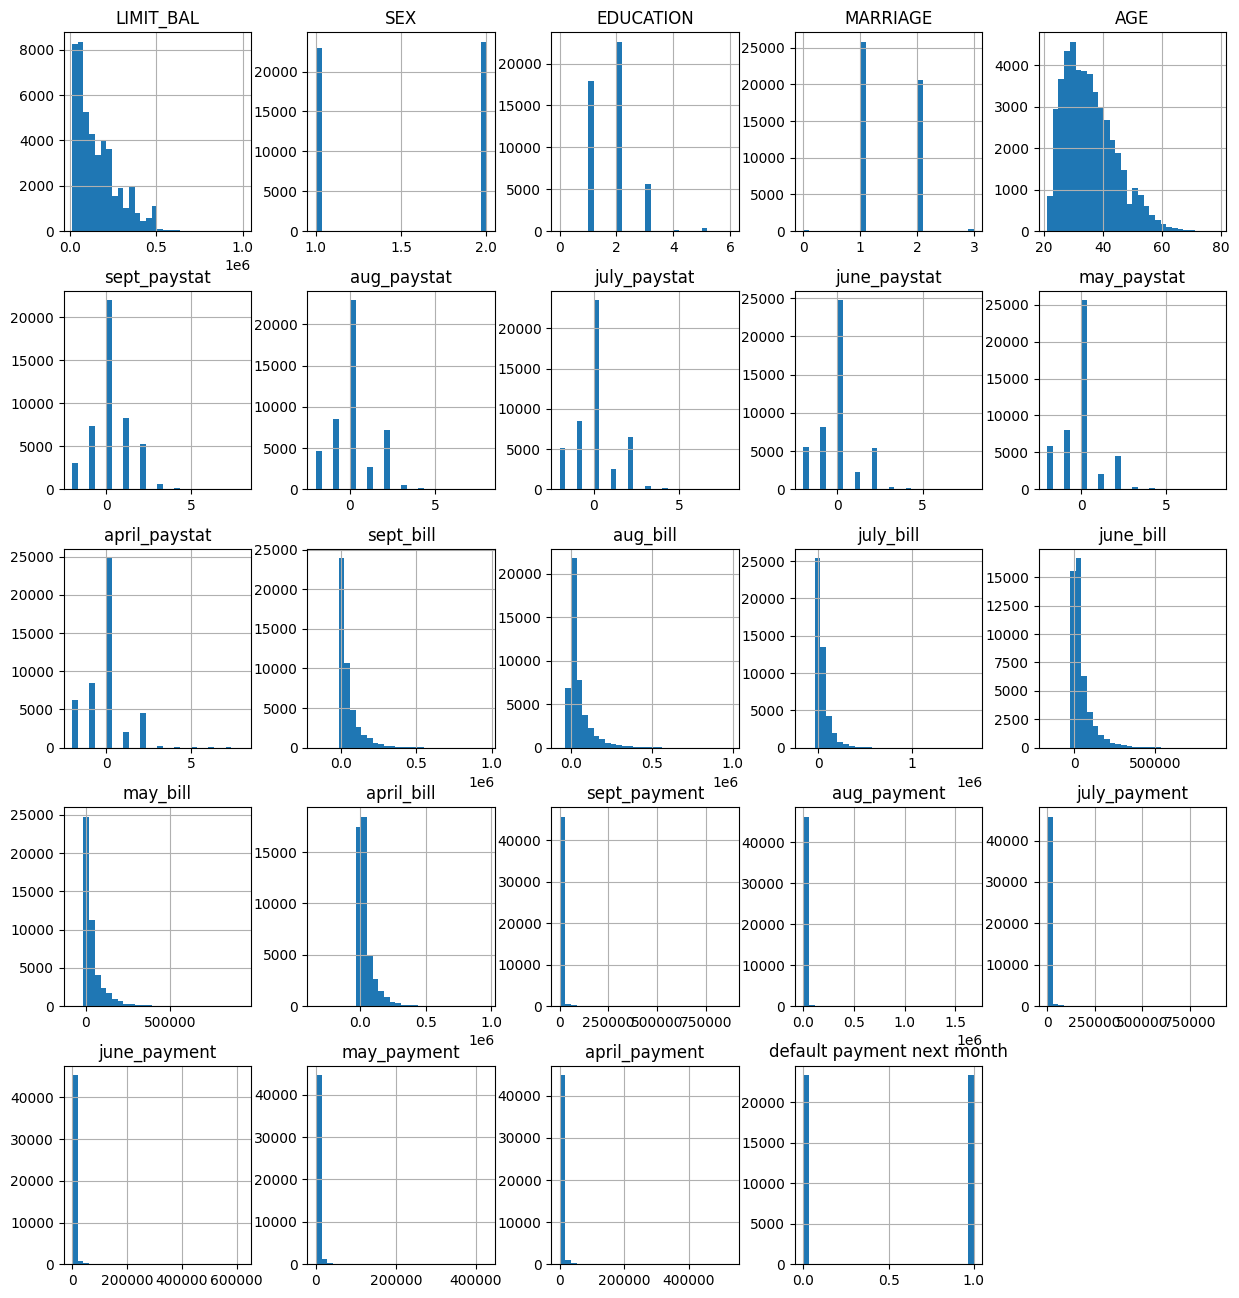

In [37]:

df3.hist(figsize=(15, 16), bins=30)
plt.show()

## check outliers in dataset

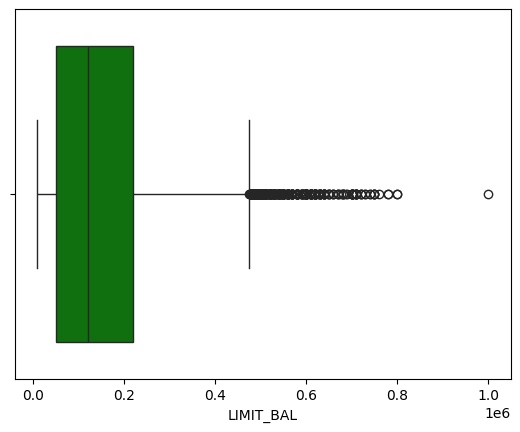

<Figure size 1200x600 with 0 Axes>

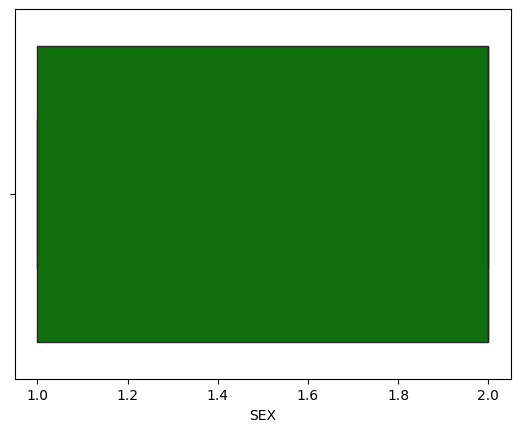

<Figure size 1200x600 with 0 Axes>

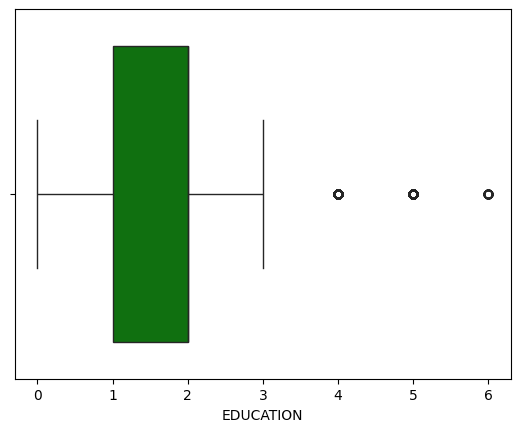

<Figure size 1200x600 with 0 Axes>

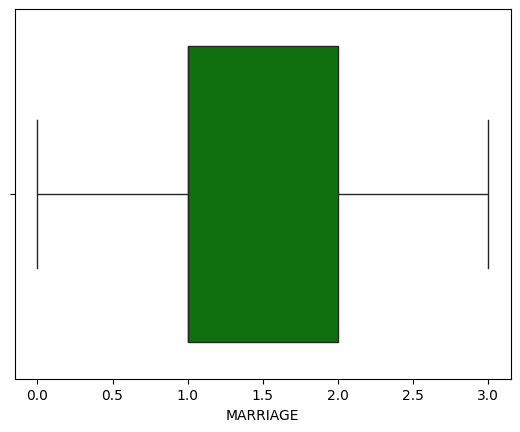

<Figure size 1200x600 with 0 Axes>

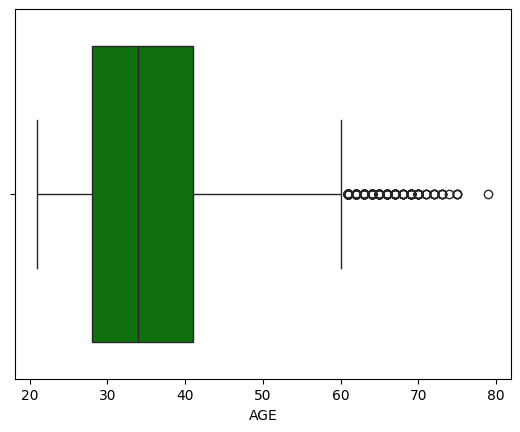

<Figure size 1200x600 with 0 Axes>

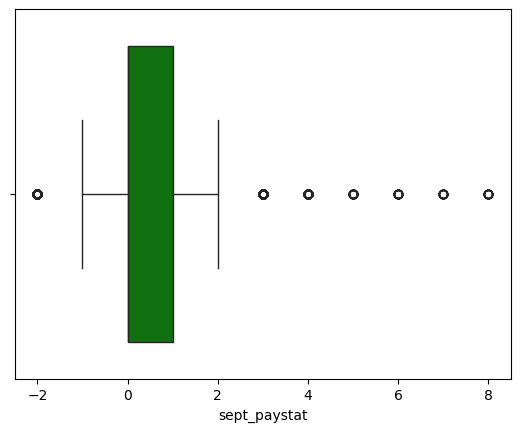

<Figure size 1200x600 with 0 Axes>

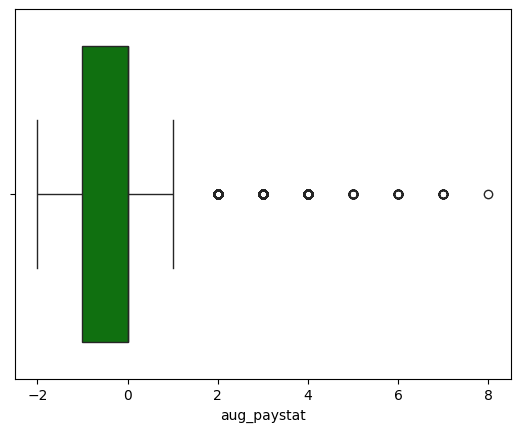

<Figure size 1200x600 with 0 Axes>

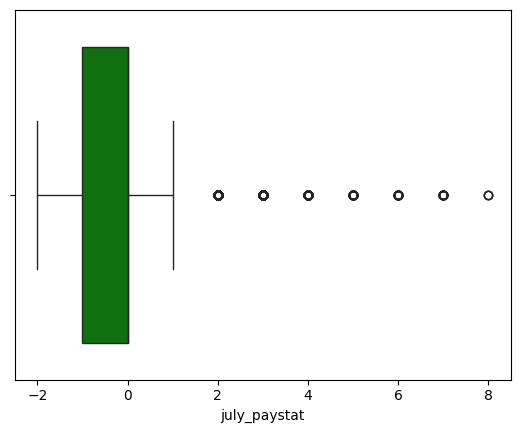

<Figure size 1200x600 with 0 Axes>

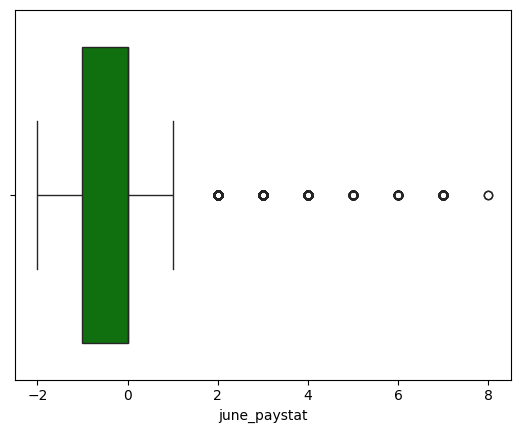

<Figure size 1200x600 with 0 Axes>

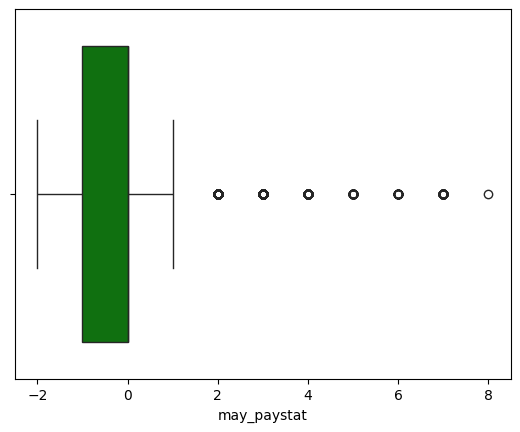

<Figure size 1200x600 with 0 Axes>

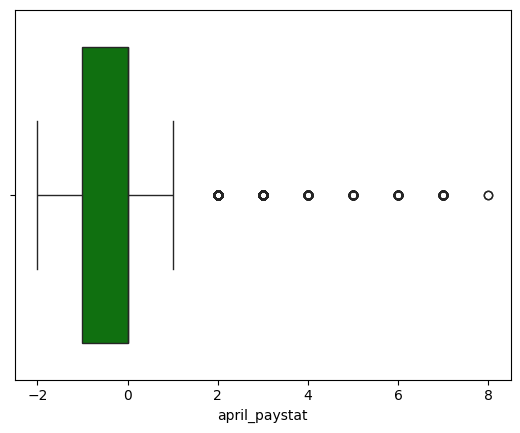

<Figure size 1200x600 with 0 Axes>

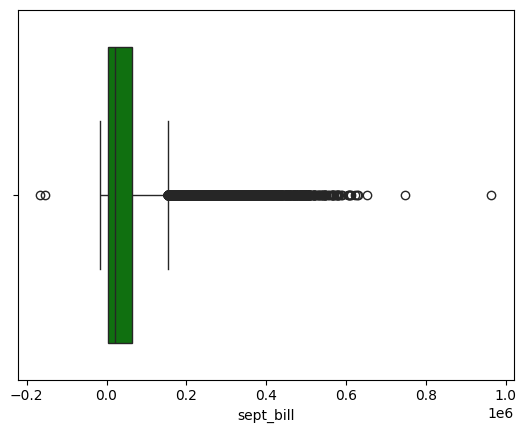

<Figure size 1200x600 with 0 Axes>

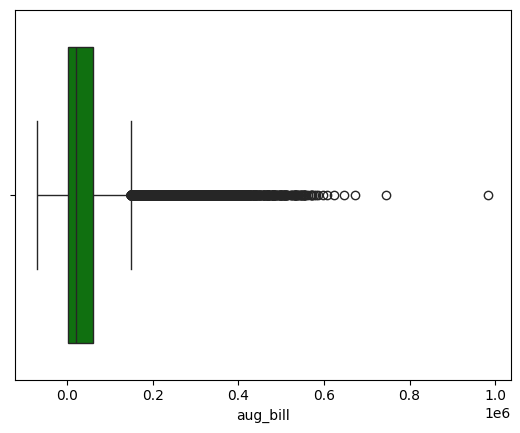

<Figure size 1200x600 with 0 Axes>

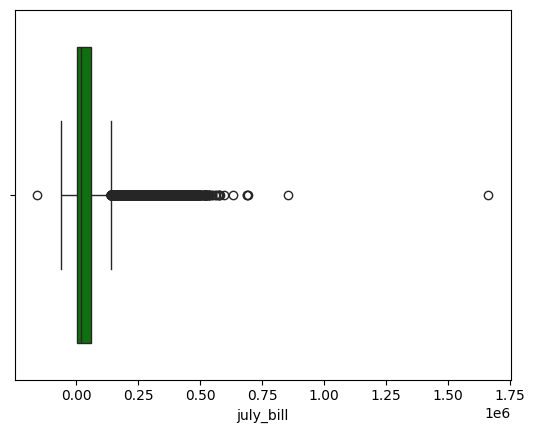

<Figure size 1200x600 with 0 Axes>

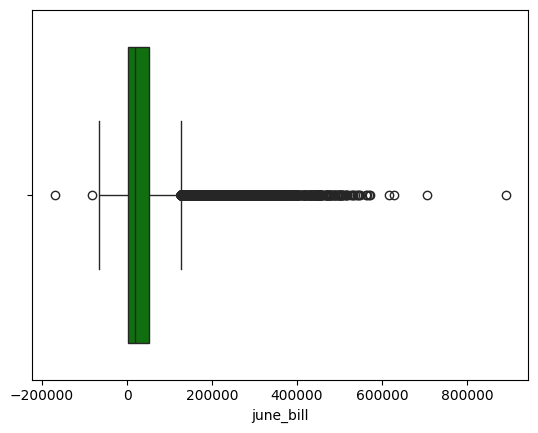

<Figure size 1200x600 with 0 Axes>

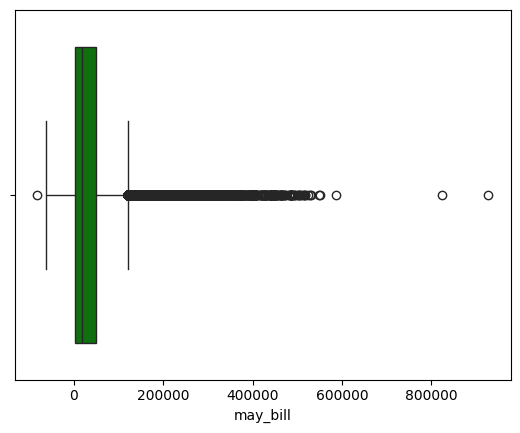

<Figure size 1200x600 with 0 Axes>

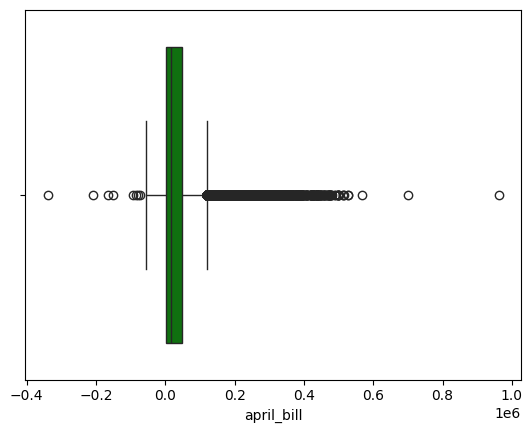

<Figure size 1200x600 with 0 Axes>

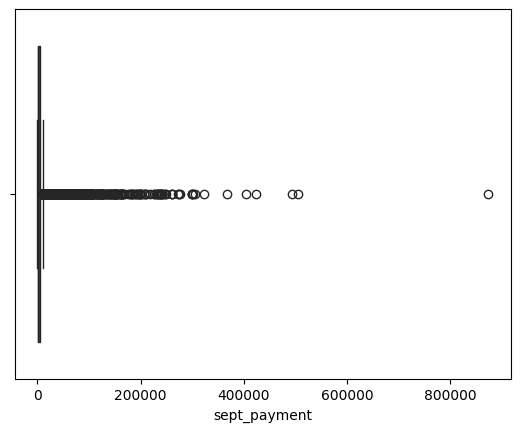

<Figure size 1200x600 with 0 Axes>

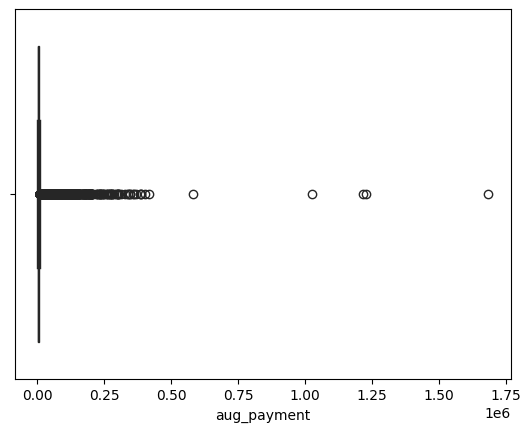

<Figure size 1200x600 with 0 Axes>

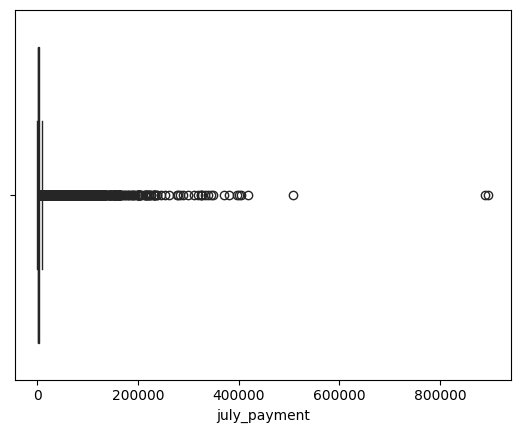

<Figure size 1200x600 with 0 Axes>

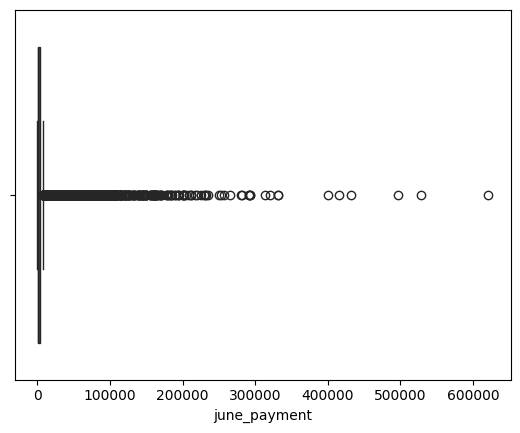

<Figure size 1200x600 with 0 Axes>

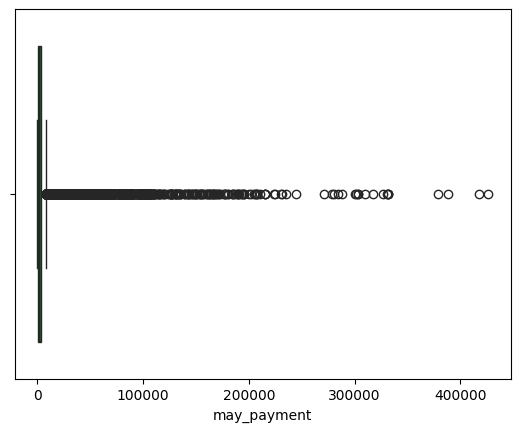

<Figure size 1200x600 with 0 Axes>

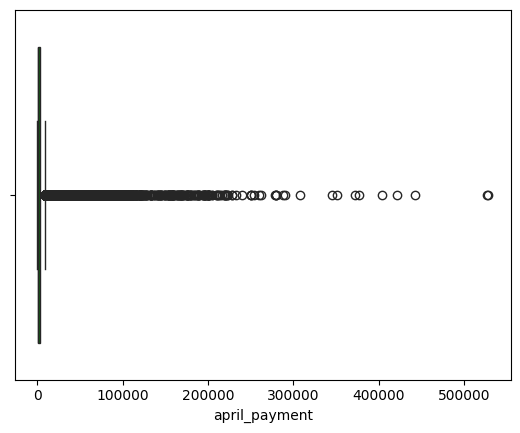

<Figure size 1200x600 with 0 Axes>

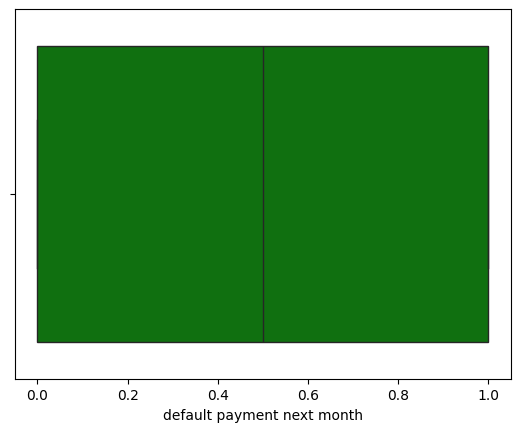

<Figure size 1200x600 with 0 Axes>

In [38]:
for i in num_cols.columns:
    sns.boxplot(x=i,data=df3,color ='g')
    plt.figure(figsize=(12, 6))
    plt.show()

## remove outlier using IQR method

In [39]:
def remove_outliers(df):
    for col in df3.select_dtypes(include=['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 =df[col].quantile(0.75)

        IQR =Q3-Q1
        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5* IQR)

        #capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x >upper else x)
    return df

In [40]:
df4 = remove_outliers(df3)

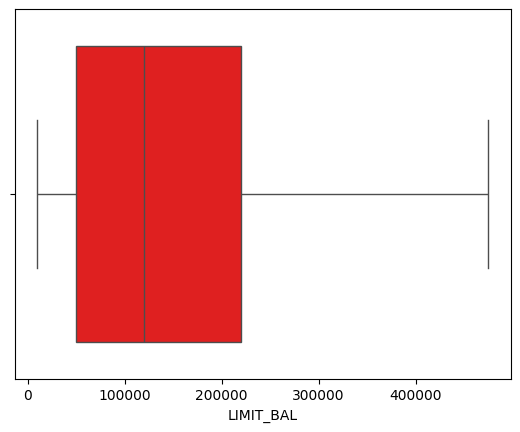

<Figure size 1200x600 with 0 Axes>

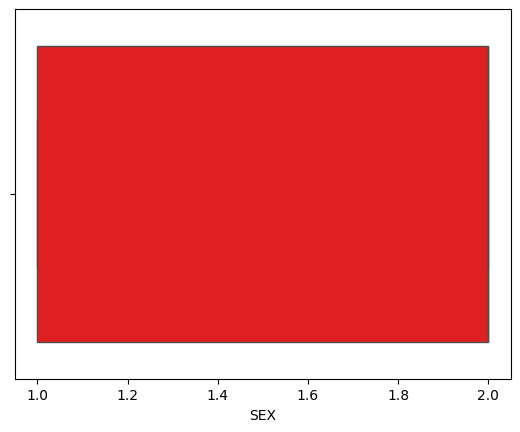

<Figure size 1200x600 with 0 Axes>

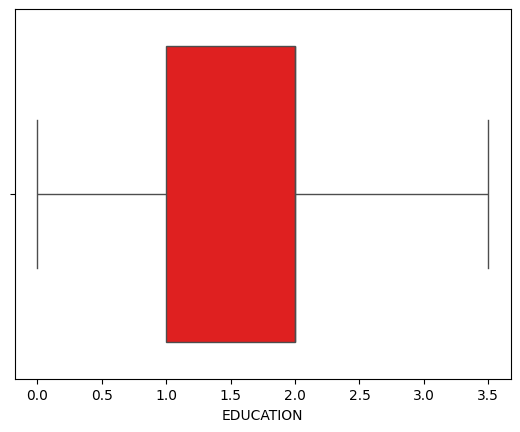

<Figure size 1200x600 with 0 Axes>

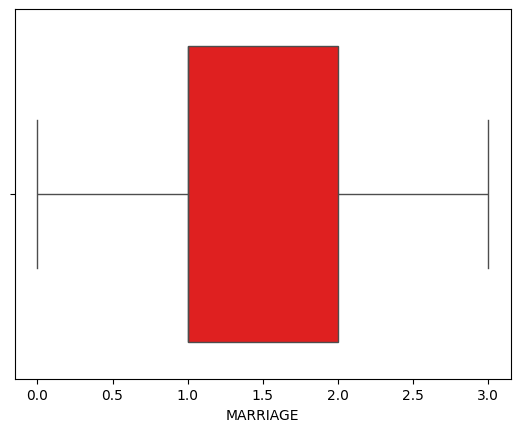

<Figure size 1200x600 with 0 Axes>

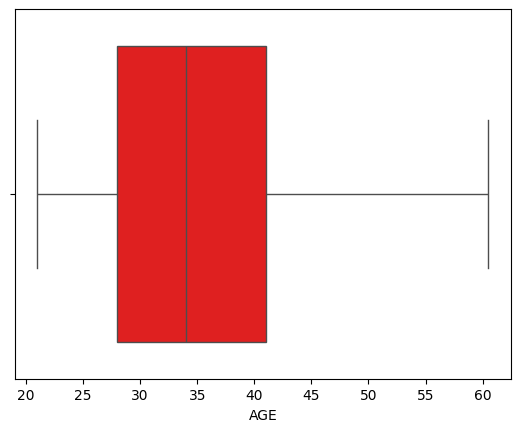

<Figure size 1200x600 with 0 Axes>

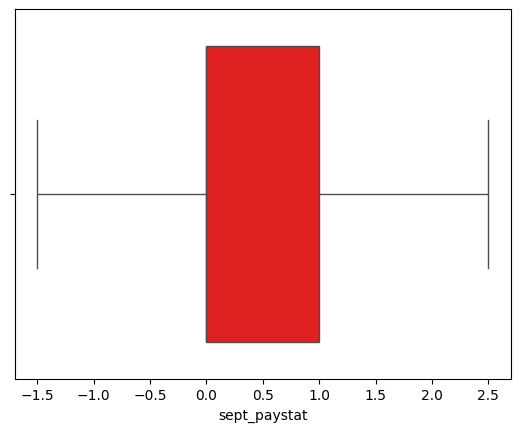

<Figure size 1200x600 with 0 Axes>

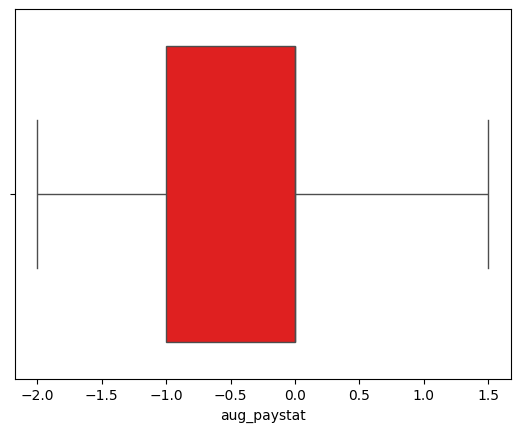

<Figure size 1200x600 with 0 Axes>

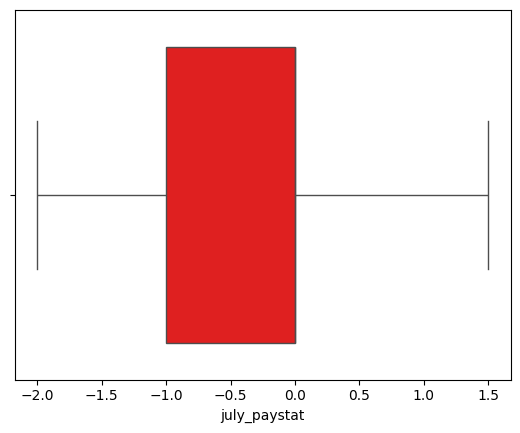

<Figure size 1200x600 with 0 Axes>

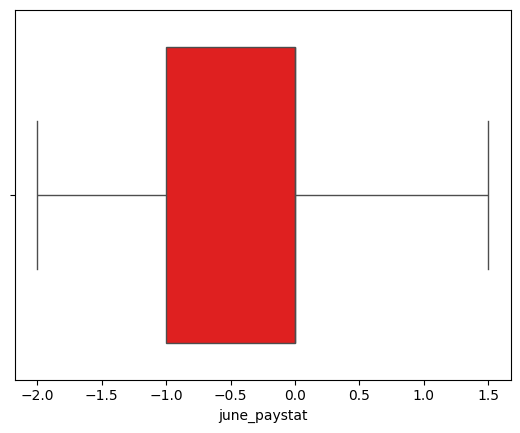

<Figure size 1200x600 with 0 Axes>

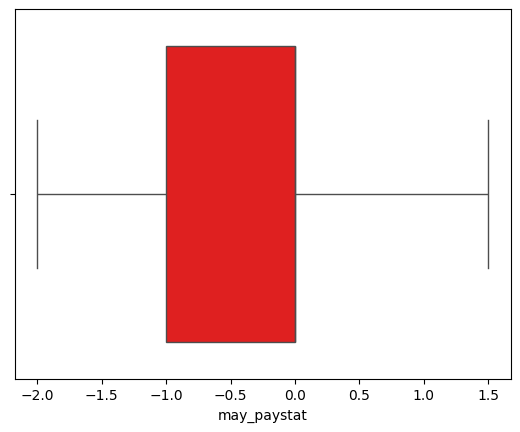

<Figure size 1200x600 with 0 Axes>

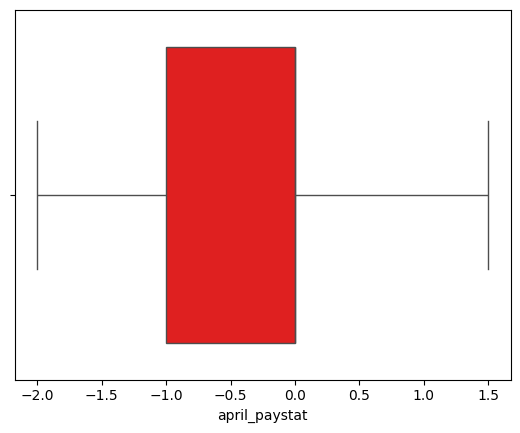

<Figure size 1200x600 with 0 Axes>

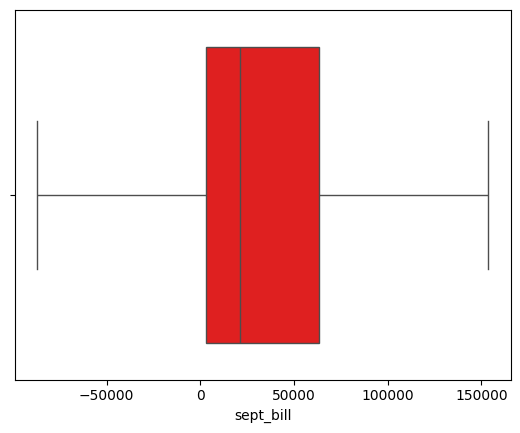

<Figure size 1200x600 with 0 Axes>

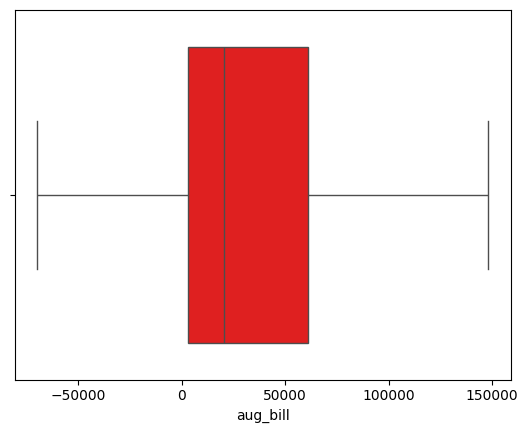

<Figure size 1200x600 with 0 Axes>

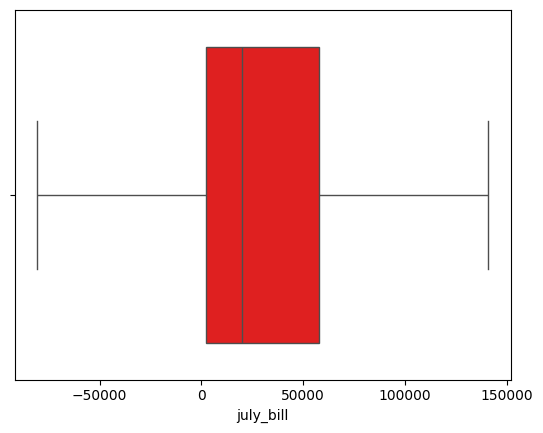

<Figure size 1200x600 with 0 Axes>

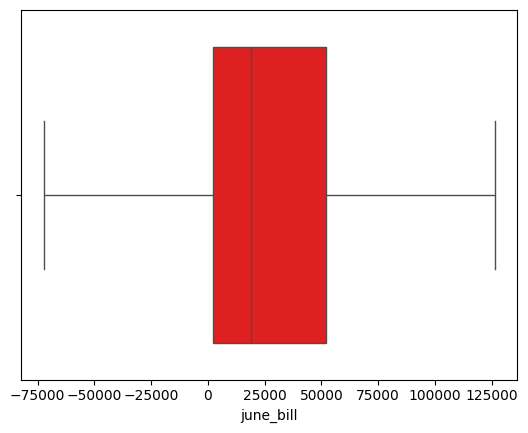

<Figure size 1200x600 with 0 Axes>

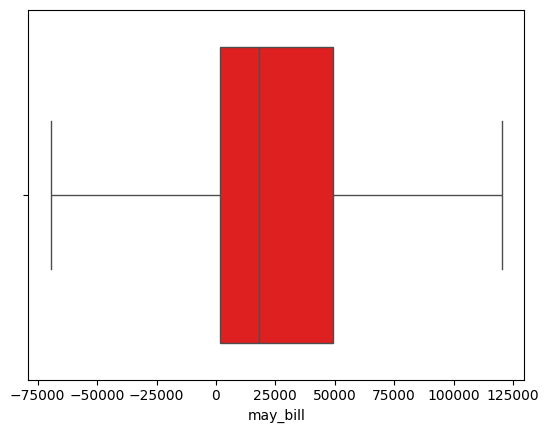

<Figure size 1200x600 with 0 Axes>

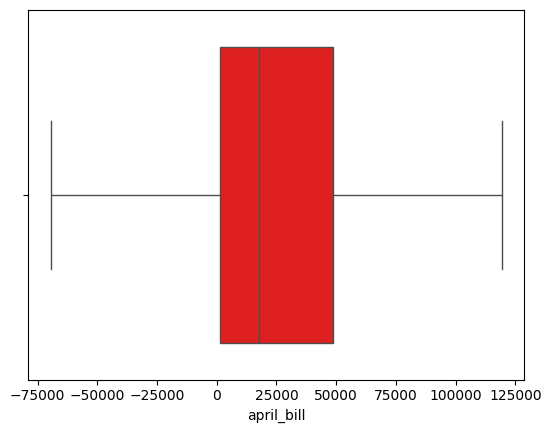

<Figure size 1200x600 with 0 Axes>

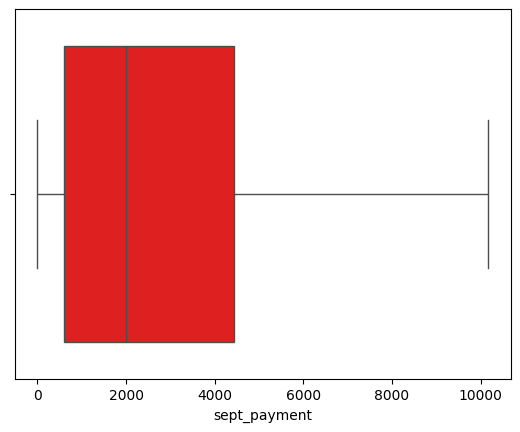

<Figure size 1200x600 with 0 Axes>

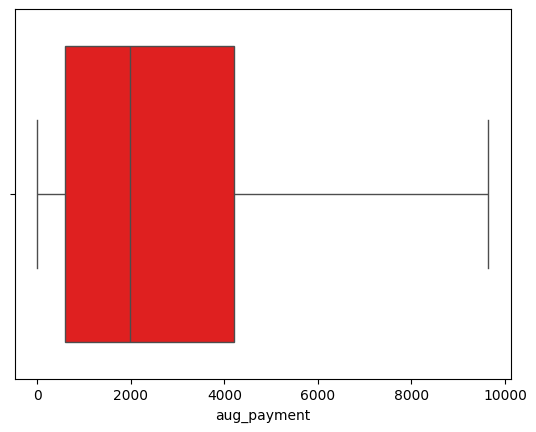

<Figure size 1200x600 with 0 Axes>

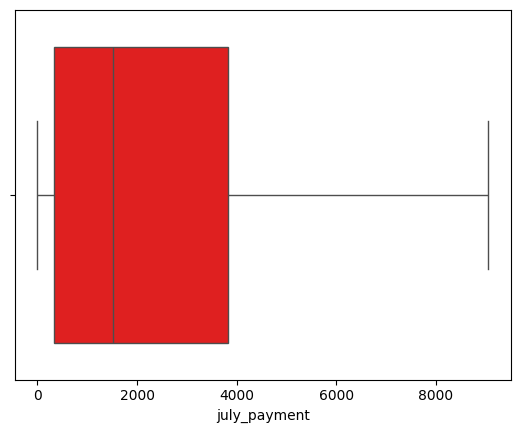

<Figure size 1200x600 with 0 Axes>

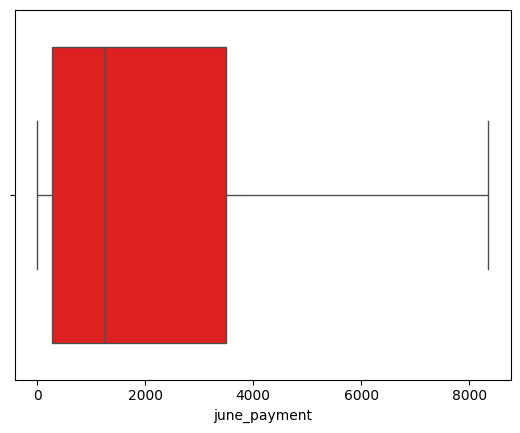

<Figure size 1200x600 with 0 Axes>

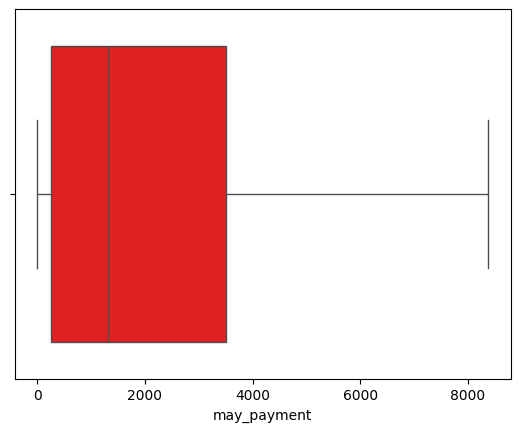

<Figure size 1200x600 with 0 Axes>

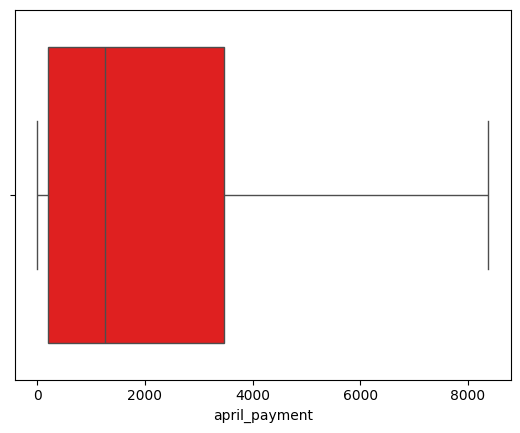

<Figure size 1200x600 with 0 Axes>

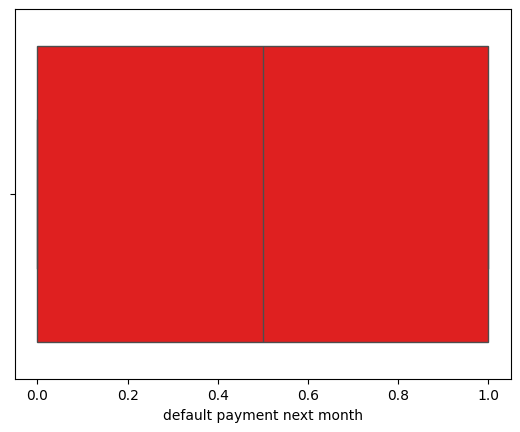

<Figure size 1200x600 with 0 Axes>

In [41]:
for i in num_cols.columns:
    sns.boxplot(x=i,data=df4,color ='r')
    plt.figure(figsize=(12, 6))
    plt.show()

In [42]:
df4.skew()

LIMIT_BAL                     0.957175
SEX                          -0.032534
EDUCATION                     0.420846
MARRIAGE                      0.314657
AGE                           0.637102
sept_paystat                  0.390471
aug_paystat                  -0.134987
july_paystat                 -0.135673
june_paystat                 -0.154181
may_paystat                  -0.179023
april_paystat                -0.146523
sept_bill                     1.184339
aug_bill                      1.179697
july_bill                     1.186105
june_bill                     1.164577
may_bill                      1.195838
april_bill                    1.207992
sept_payment                  1.133378
aug_payment                   1.117069
july_payment                  1.187149
june_payment                  1.189676
may_payment                   1.172981
april_payment                 1.192510
default payment next month    0.000000
dtype: float64

### Correlation

<Axes: >

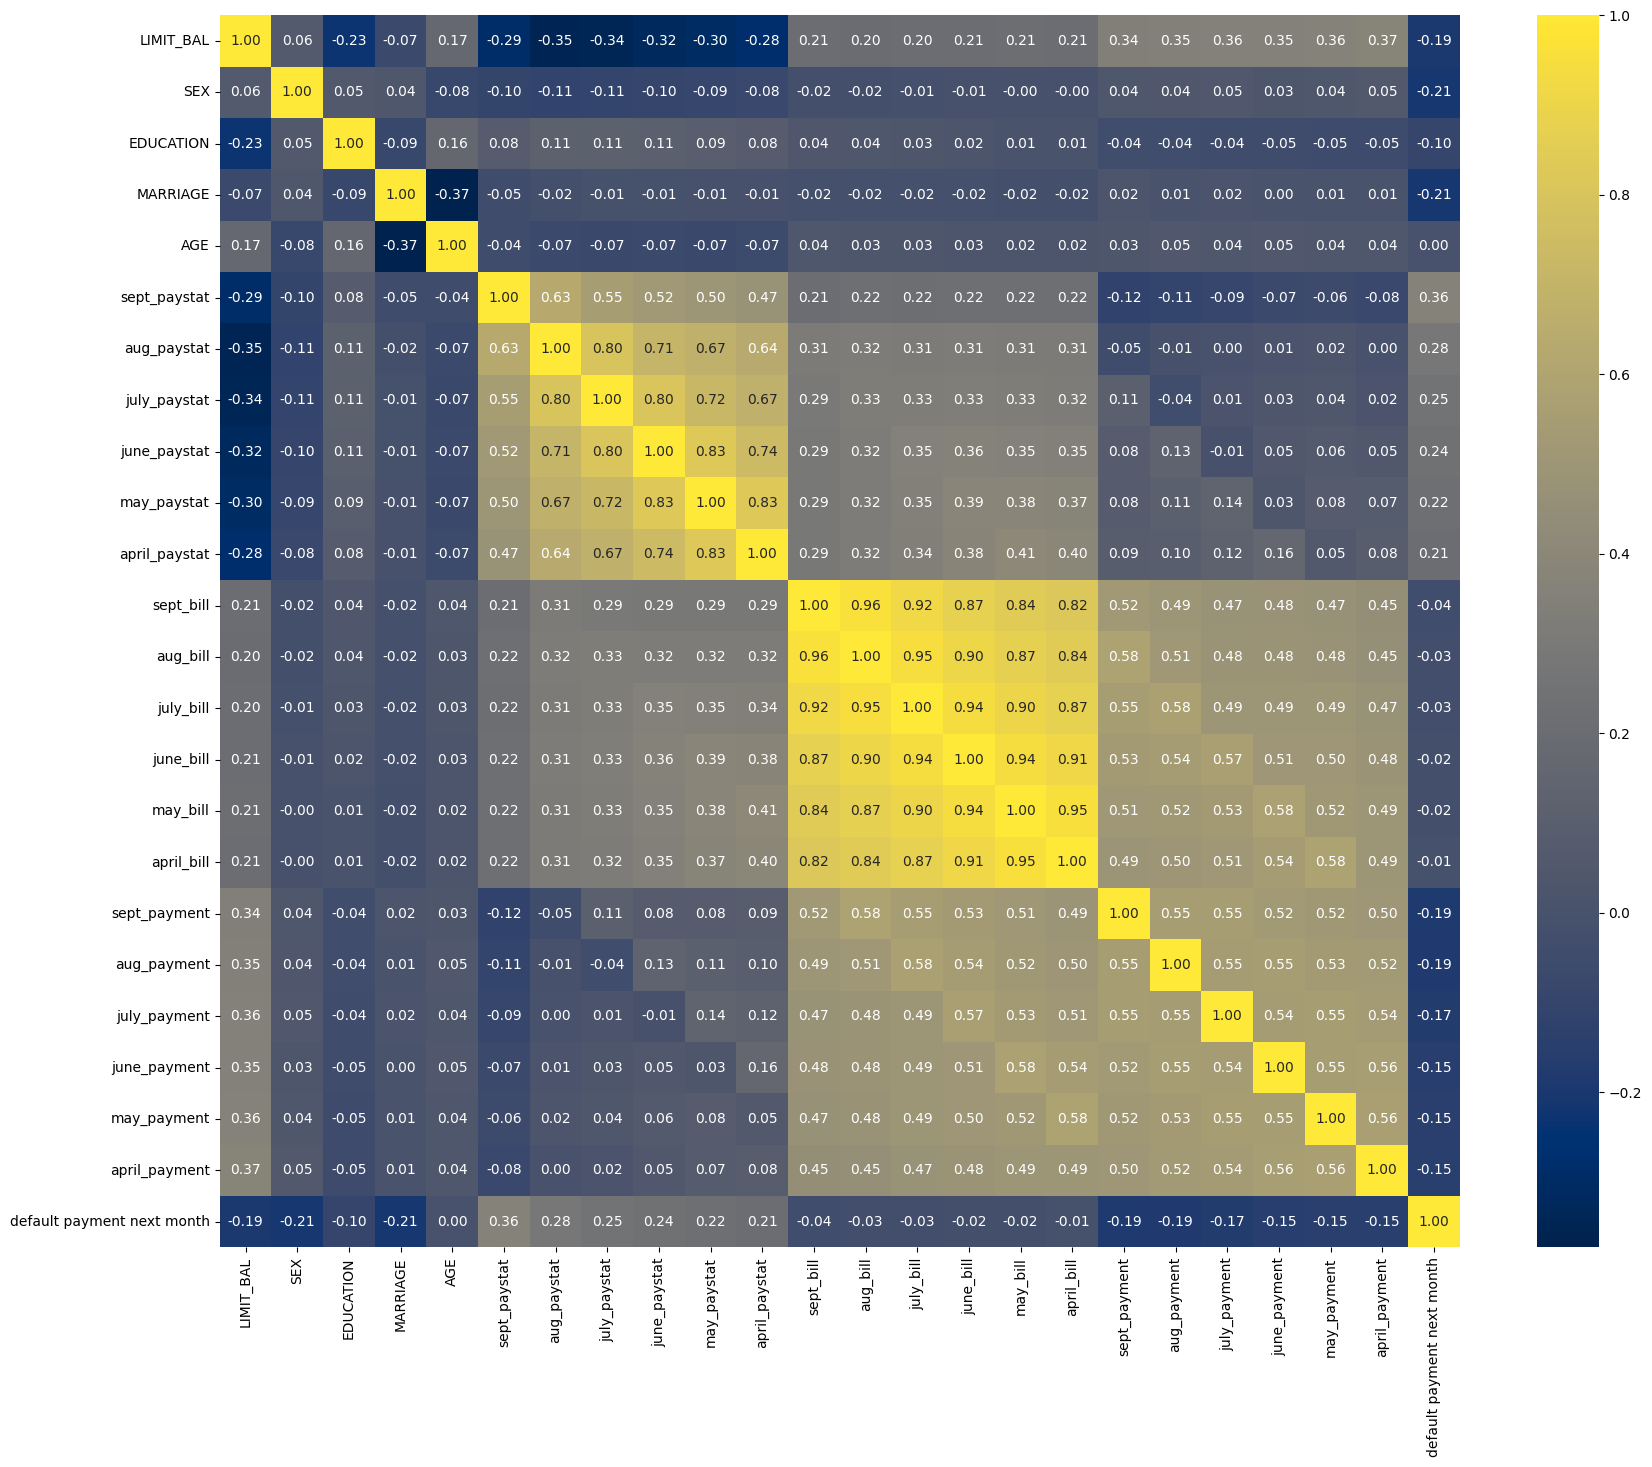

In [43]:
corr =df4.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr,annot=True,cmap="cividis",fmt ='.2f')

## Feature selection

In [44]:
df4.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,sept_paystat,aug_paystat,july_paystat,june_paystat,may_paystat,...,june_bill,may_bill,april_bill,sept_payment,aug_payment,july_payment,june_payment,may_payment,april_payment,default payment next month
0,20000.0,2,2.0,1,24.0,2.0,1.5,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2.0,2,26.0,-1.0,1.5,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [45]:
X = df4.drop(['default payment next month'],axis=1)
y= df4['default payment next month']

In [46]:
sk = SelectKBest(score_func = f_classif, k=10)

In [47]:
X_new = sk.fit_transform(X,y)

In [48]:
selected_features = X.columns[sk.get_support()]

In [49]:
feature_score = pd.DataFrame({'Feature':X.columns,'score':sk.scores_}).sort_values(by='score',ascending =False)

In [50]:
print(selected_features )
print("/nfeature scores:")
print(feature_score)

Index(['LIMIT_BAL', 'SEX', 'MARRIAGE', 'sept_paystat', 'aug_paystat',
       'july_paystat', 'june_paystat', 'may_paystat', 'april_paystat',
       'sept_payment'],
      dtype='object')
/nfeature scores:
          Feature        score
5    sept_paystat  6816.689144
6     aug_paystat  4094.834350
7    july_paystat  3206.550652
8    june_paystat  2750.700593
9     may_paystat  2451.224322
1             SEX  2200.262776
3        MARRIAGE  2097.227028
10  april_paystat  2088.274295
0       LIMIT_BAL  1814.432985
17   sept_payment  1763.023382
18    aug_payment  1657.660765
19   july_payment  1394.269787
20   june_payment  1125.681160
22  april_payment  1113.291238
21    may_payment  1017.346408
2       EDUCATION   444.108270
11      sept_bill    75.575018
12       aug_bill    47.381400
13      july_bill    40.362669
14      june_bill    26.397806
15       may_bill    18.063124
16     april_bill     7.105482
4             AGE     0.024988


In [51]:
X_selected = X[selected_features]

In [52]:
X_selected.head(2)

,LIMIT_BAL,SEX,MARRIAGE,sept_paystat,aug_paystat,july_paystat,june_paystat,may_paystat,april_paystat,sept_payment
0,20000.0,2,1,2.0,1.5,-1.0,-1.0,-2.0,-2.0,0.0
1,120000.0,2,2,-1.0,1.5,0.0,0.0,0.0,1.5,0.0


## Scaling

In [53]:
scaler = StandardScaler()


In [54]:
X_scaled = scaler.fit_transform(X_selected)

In [55]:
X_scaled

array([[-1.08383787,  0.9838658 , -0.87891837, ..., -1.86699219,
        -1.80083107, -0.97361555],
       [-0.26715228,  0.9838658 ,  1.06541234, ...,  0.22232032,
         1.78635494, -0.97361555],
       [-0.51215796,  0.9838658 ,  1.06541234, ...,  0.22232032,
         0.24898951, -0.49230113],
       ...,
       [-0.75716364,  0.9838658 , -0.87891837, ...,  0.22232032,
        -0.77592078, -0.68603177],
       [-0.8388322 , -1.01639878,  1.06541234, ...,  0.22232032,
         0.24898951, -0.40288699],
       [-0.8388322 , -1.01639878, -0.87891837, ...,  0.22232032,
         0.24898951, -0.63054427]])

## TRAIN TEST SPLIT

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size =0.2,random_state=42)

In [57]:
print(F"X_train:{X_train.shape}\nX_test:{X_test.shape}\ny_train:{y_train.shape}\ny_test:{y_train.shape}\n ")

X_train:(37382, 10)
X_test:(9346, 10)
y_train:(37382,)
y_test:(37382,)
 


## MODEL

In [58]:
models ={
    '1.LogisticRegression':LogisticRegression(),
    '2. SVC':SVC(),
    '3. DecisionTreeClassifier':DecisionTreeClassifier(),
    '4. Randomforest':RandomForestClassifier(),
    '5.Gradient Boosting': GradientBoostingClassifier(),
    '6.AdaBoost': AdaBoostClassifier(),
    '7.Naive Bayes':GaussianNB()
}

In [59]:
results ={}
for name,model in models.items():
    print(f"\nTraining Name{name}--->")
    model.fit(X_train,y_train)
    y_pred    = model.predict(X_test)
    accuracy  = accuracy_score(y_test,y_pred)
    results[name]= {
        'model':model,
        'accuracy':accuracy_score,
        'Report':classification_report(y_test,y_pred)
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print("\nClassificationReport")
    print(results[name]['Report'])
    


Training Name1.LogisticRegression--->
1.LogisticRegression Accuracy: 0.6907

ClassificationReport
              precision    recall  f1-score   support

           0       0.69      0.68      0.69      4664
           1       0.69      0.70      0.69      4682

    accuracy                           0.69      9346
   macro avg       0.69      0.69      0.69      9346
weighted avg       0.69      0.69      0.69      9346


Training Name2. SVC--->
2. SVC Accuracy: 0.7377

ClassificationReport
              precision    recall  f1-score   support

           0       0.71      0.81      0.75      4664
           1       0.78      0.67      0.72      4682

    accuracy                           0.74      9346
   macro avg       0.74      0.74      0.74      9346
weighted avg       0.74      0.74      0.74      9346


Training Name3. DecisionTreeClassifier--->
3. DecisionTreeClassifier Accuracy: 0.7338

ClassificationReport
              precision    recall  f1-score   support

           0

In [60]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    random_state=42,
    n_estimators=50,         
    max_depth=10,             
    min_samples_split=5,      
    min_samples_leaf=2,       
    max_features='sqrt',      
    n_jobs=-1                
)

In [61]:
param_grid = {
    'n_estimators': [50, 100, 200,300],  
    'max_depth': [10, 20, None],     
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]   
}

In [62]:
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=10,  
    scoring=['accuracy', 'f1', 'roc_auc'],  # Use multiple metrics
    refit='f1',  # Choose best model based on F1-score
    n_jobs=-1, 
    verbose=2   
)


In [63]:
grid_search.fit(X_train, y_train)        

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                              min_samples_split=5,
                                              n_estimators=50, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             refit='f1', scoring=['accuracy', 'f1', 'roc_auc'], verbose=2)

In [64]:
print("Best Parameters:", grid_search.best_params_)  
print(f"Best {grid_search.refit} Score:", grid_search.best_score_)  # This prints best F1-score


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best f1 Score: 0.7793312582416672


In [65]:
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(min_samples_split=10, n_estimators=300, n_jobs=-1,
                       random_state=42)

In [66]:
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(
    max_features='sqrt',
    n_estimators=300,
    n_jobs=-1,
    random_state=42
)


In [67]:
best_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [68]:
y_pred = best_model.predict(X_test)

In [69]:
ccuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.6783650759683287
F1 Score: 0.7659341860719362


## Save MODEL

In [70]:
import joblib

In [71]:
joblib.dump(best_model,"CreditClass.joblib")

['CreditClass.joblib']

In [72]:
load_model = joblib.load("CreditClass.joblib")

## PIPELINE

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [74]:
pipeline =Pipeline([
    ('imputer',SimpleImputer(strategy='mean')), #missing values -fillna
    ('scaler' ,StandardScaler()),
    ('BestModel',RandomForestClassifier(random_state=42))
])

In [75]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('BestModel', RandomForestClassifier(random_state=42))])

In [76]:
#save pipeline

joblib.dump(pipeline,"creditCardRandomPipe.joblib")

['creditCardRandomPipe.joblib']

In [77]:
loaded_pipeline = joblib.load("creditCardRandomPipe.joblib")

In [78]:
df_unseen = pd.read_csv('unseenx.csv')

In [79]:
df_unseen.head(10)

,LIMIT_BAL,SEX,MARRIAGE,AGE,sept_paystat,aug_paystat,july_paystat,june_paystat,may_paystat,april_paystat,default payment next month
0,20000,2,1,24,2,2,-1,-1,-2,-2,1
1,120000,2,2,26,-1,2,0,0,0,2,1
2,90000,2,2,34,0,0,0,0,0,0,0
3,50000,2,1,37,0,0,0,0,0,0,0
4,50000,1,1,57,-1,0,-1,0,0,0,0
5,50000,1,2,37,0,0,0,0,0,0,0
6,500000,1,2,29,0,0,0,0,0,0,0
7,100000,2,2,23,0,-1,-1,0,0,-1,0
8,140000,2,1,28,0,0,2,0,0,0,0
9,20000,1,2,35,-2,-2,-2,-2,-1,-1,0


In [81]:
#split the df_unseen

X_unseen = df_unseen.drop('default payment next month',axis=1)
y_unseen = df_unseen['default payment next month']

## prediction

In [82]:
y_predunseen  = loaded_pipeline.predict(X_unseen)

C:\Users\sachu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [83]:
df_unseen['y_predict'] = y_predunseen

In [84]:
df_unseen.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,sept_paystat,aug_paystat,july_paystat,june_paystat,may_paystat,april_paystat,default payment next month,y_predict
0,20000,2,1,24,2,2,-1,-1,-2,-2,1,1
1,120000,2,2,26,-1,2,0,0,0,2,1,0
2,90000,2,2,34,0,0,0,0,0,0,0,1
3,50000,2,1,37,0,0,0,0,0,0,0,1
4,50000,1,1,57,-1,0,-1,0,0,0,0,0


In [85]:
df_unseen.to_csv('unseenx.csv',index=False)